In [1]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 12})
mpl.rcParams['axes.formatter.useoffset'] = False

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
 

In [2]:
import utils.load_grid as lg
from utils.load_cmaps import *

In [3]:
#import utils.phys as phys

In [4]:
pgrid_dir = "data/article_data/jgr_5"
cases = lg.get_cases(pgrid_dir)

In [5]:
# Collect netcdf files
stts = lg.get_statuses(pgrid_dir)
endn = lg.load_netcdfs_end(cases)

# Configuration variables
cvars = lg.load_cvars(cases)
ncases = len(cases)

# Helpfiles
helps, hvars = lg.load_helpfiles(cases)

print("Done")

Helpfiles: 100%|██████████| 1029/1029 [00:21<00:00, 46.87it/s]


Done


In [6]:
%matplotlib widget

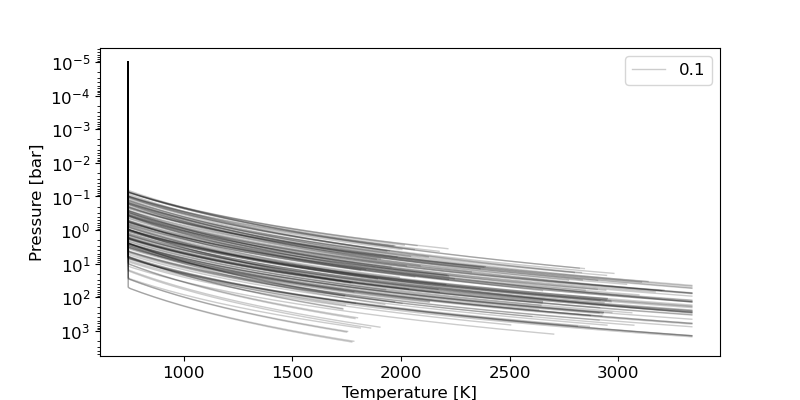

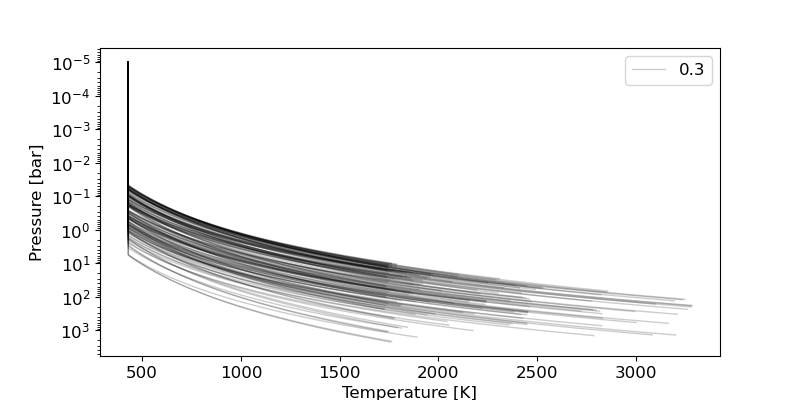

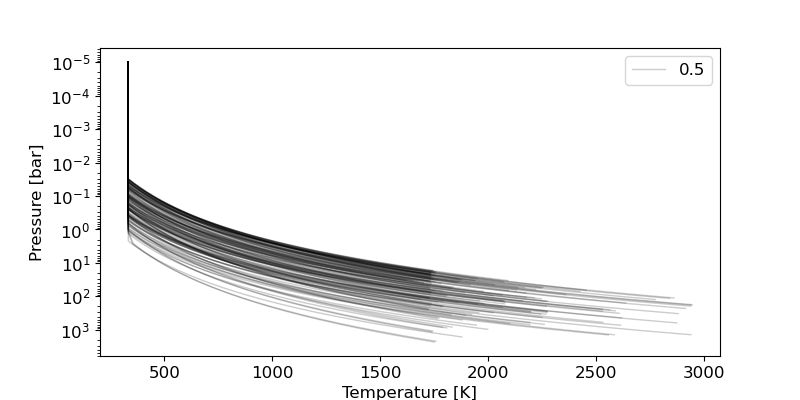

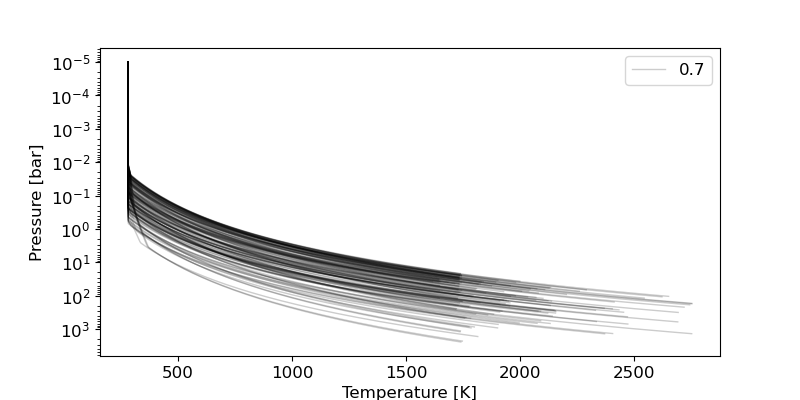

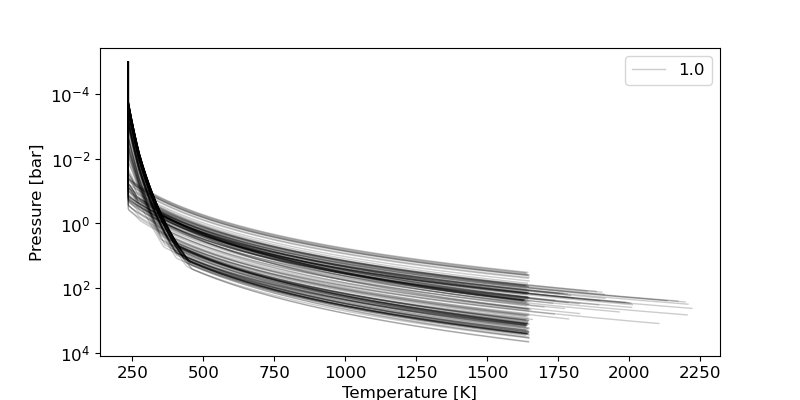

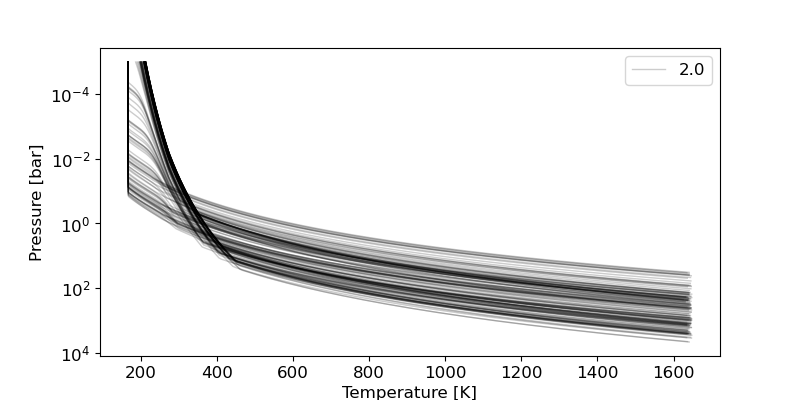

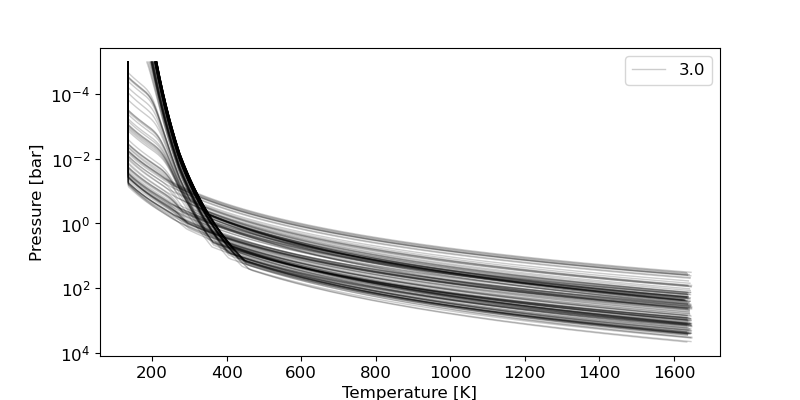

In [8]:
plt.close("all")

# get distances
color_key = "mean_distance"
dists = np.unique(cvars[color_key])
cdict = {}
for i,d in enumerate(dists):
    cdict[d] = mpl.colormaps.get_cmap('jet')((i+1)/len(dists))


for i,d in enumerate(dists):

    fig,ax = plt.subplots(1,1, figsize=(8,4), sharey=True)

    # c = cdict[d]
    c = 'black'
    idxs = np.argwhere(cvars[color_key] == d).T[0]

    for j,idx in enumerate(idxs):
        # get pt
        p_arr = np.array(endn[idx]["pl"]) * 1.0e-5
        t_arr = np.array(endn[idx]["tmpl"])

        # plot 
        lbl = ""
        if j == 0:
            lbl = "%.1f"%d
        ax.plot(t_arr, p_arr, color=c, alpha=0.2, lw=1, label=lbl)

# condensation curves
# for vol in ["H2O","CO2","CH4"]:
#     if not hasattr(phys, vol):
#         continue
#     gas = getattr(phys,vol)
#     e = phys.satvps_function(gas)
#     t = np.linspace(200, 1000, 100)
#     p = [e(v)*1.0e-5 for v in t]

#     ax.plot(t,p, linestyle='dashed', lw=1, color=lg.volatile_colors[vol], label=lg.volatile_pretty[vol])


    ax.set_yscale("log")
    ax.invert_yaxis()
    ax.set_ylabel("Pressure [bar]")
    ax.set_xlabel("Temperature [K]")

    ax.legend(loc='upper right', ncol=2)

    plt.show()